<a href="https://colab.research.google.com/github/JCbarajas5/Machine-Learning-Anahuac/blob/main/Practica1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Practica 1



## 1) Lea el archivo de excel “Politics_BD.xlsx” y cárguelo en un Dataframe llamado data, imprima los primeros 5 registros para revisar que se haya cargado de manera correcta.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


candidates = ["Politics_BD.xlsx", "/content/Politics_BD.xlsx", "/mnt/data/Politics_BD.xlsx"]
FILE_PATH = next((p for p in candidates if Path(p).exists()), None)

data = pd.read_excel(FILE_PATH)
data.head()


,District_Type,Region_ID,Education_Index,Income_Level,Media_Exposure,Campaign_Intensity,Citizen_Engagement,Support_Level
0,1,3,4,4,5,5,82,2
1,2,5,3,3,4,4,74,2
2,1,1,5,5,4,5,88,2
3,3,6,2,2,3,3,69,1
4,2,4,3,2,3,3,63,1


##2) Obtenga el tamaño de la BD y obtenga la descripción general de la base de datos

In [5]:
print("Tamaño (filas, columnas):", data.shape)

print("\n--- info() ---")
data.info()

print("\n--- describe(include='all') ---")
data.describe(include="all")


Tamaño (filas, columnas): (67, 8)

--- info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   District_Type       67 non-null     int64
 1   Region_ID           67 non-null     int64
 2   Education_Index     67 non-null     int64
 3   Income_Level        67 non-null     int64
 4   Media_Exposure      67 non-null     int64
 5   Campaign_Intensity  67 non-null     int64
 6   Citizen_Engagement  67 non-null     int64
 7   Support_Level       67 non-null     int64
dtypes: int64(8)
memory usage: 4.3 KB

--- describe(include='all') ---


,District_Type,Region_ID,Education_Index,Income_Level,Media_Exposure,Campaign_Intensity,Citizen_Engagement,Support_Level
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,2.000000,5.522388,2.820896,2.731343,3.149254,3.029851,64.701493,1.044776
std,0.816497,2.935458,1.369864,1.309431,1.234034,1.325395,19.977271,0.805903
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,0.000000
25%,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,47.000000,0.000000
50%,2.000000,6.000000,3.000000,3.000000,3.000000,3.000000,68.000000,1.000000
75%,3.000000,8.000000,4.000000,4.000000,4.000000,4.000000,79.500000,2.000000
max,3.000000,10.000000,5.000000,5.000000,5.000000,5.000000,95.000000,2.000000


##3) Asigne en un Dataframe llamado X las variables predictoras (District_Type, Region_ID,Education_Index, Income_Level, Media_Exposure, Campaign_Intensity, Citizen_Engagement) yen un Dataframe llamado Y la variable objetivo (Support_Level). Imprima los 5 primeros registros de X y Y para asegurar que se cargaron correctamente.

In [6]:
predictors = [
    "District_Type", "Region_ID", "Education_Index", "Income_Level",
    "Media_Exposure", "Campaign_Intensity", "Citizen_Engagement"
]
target = "Support_Level"

missing = [c for c in predictors + [target] if c not in data.columns]
if missing:
    raise KeyError(f"Faltan columnas en el Excel: {missing}\nColumnas disponibles: {list(data.columns)}")

X = data[predictors].copy()
Y = data[target].copy()

# Si Support_Level viene como texto, conviértelo a 0/1/2 (Low/Medium/High)
if Y.dtype == "O":
    support_map = {"Low": 0, "Medium": 1, "High": 2, "low": 0, "medium": 1, "high": 2}
    if set(Y.dropna().unique()).issubset(set(support_map.keys())):
        Y = Y.map(support_map).astype(int)
    else:
        raise ValueError(f"Support_Level parece texto pero no coincide con {list(support_map.keys())}. "
                         f"Valores encontrados: {Y.unique()}")

print("X.head():")
display(X.head())

print("Y.head():")
display(Y.head())


X.head():


,District_Type,Region_ID,Education_Index,Income_Level,Media_Exposure,Campaign_Intensity,Citizen_Engagement
0,1,3,4,4,5,5,82
1,2,5,3,3,4,4,74
2,1,1,5,5,4,5,88
3,3,6,2,2,3,3,69
4,2,4,3,2,3,3,63


Y.head():


,Support_Level
0,2
1,2
2,2
3,1
4,1


#4) Divida la base de datos en un conjunto de prueba (test) y de entrenamiento (train). Tomando 20 por ciento de la base total para el conjunto de prueba (test).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.20,
    random_state=42,
    stratify=Y if Y.nunique() > 1 else None
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (53, 7) Test: (14, 7)


##5) Construya su modelo utilizando árboles de decisión y ajústelos al conjunto de entrenamiento (train).

In [8]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

print("Modelo entrenado.")


Modelo entrenado.


## 6) Obtenga el score obtenido para el conjunto de prueba test.

In [9]:
score_test = tree.score(X_test, y_test)
print("Score (accuracy) en test:", score_test)


Score (accuracy) en test: 0.7857142857142857


## 7) Genere la matriz de confusión.

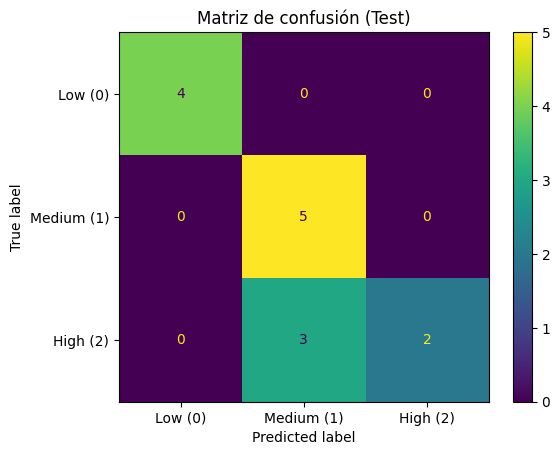

array([[4, 0, 0],
       [0, 5, 0],
       [0, 3, 2]])

In [10]:
y_pred = tree.predict(X_test)

labels = [0, 1, 2]  # 0=Low, 1=Medium, 2=High
cm = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low (0)", "Medium (1)", "High (2)"])
disp.plot()
plt.title("Matriz de confusión (Test)")
plt.show()

cm


## 8) Tomando en cuenta el inciso anterior, indique
A) Cuántos registros se clasificaron correctamente como Medium (1)
B) Cuántos registros eran Medium pero se clasificaron incorrectamente como Hig(2)
C) Cuántos registros se clasificaron correctamente como High (2)

In [12]:
# cm[true, pred] con labels [0,1,2]
A = cm[1, 1]  # Medium clasificado como Medium
B = cm[1, 2]  # Medium clasificado como High
C = cm[2, 2]  # High clasificado como High

print("A) Medium correctamente como Medium (1):", A)
print("B) Medium clasificado incorrectamente como High (2):", B)
print("C) High correctamente como High (2):", C)


A) Medium correctamente como Medium (1): 5
B) Medium clasificado incorrectamente como High (2): 0
C) High correctamente como High (2): 2


## 9) Si un ciudadano tiene las siguientes características District_Type =1, Region_ID=1,
Education_Index=5, Income_Level=5, Media_Exposure=4, Campaign_Intensity=5,
Citizen_Engagement=88 . ¿Qué categoría le asigna automáticamente el árbol de decisión 0-Low,
1-Medium, 2- High?

In [13]:
new_case = pd.DataFrame([{
    "District_Type": 1,
    "Region_ID": 1,
    "Education_Index": 5,
    "Income_Level": 5,
    "Media_Exposure": 4,
    "Campaign_Intensity": 5,
    "Citizen_Engagement": 88
}])

pred_class = int(tree.predict(new_case)[0])
inv_map = {0: "Low", 1: "Medium", 2: "High"}

print("Clase predicha (0=Low,1=Medium,2=High):", pred_class)
print("Etiqueta:", inv_map.get(pred_class, "Desconocida"))


Clase predicha (0=Low,1=Medium,2=High): 2
Etiqueta: High


##10) Grafique el árbol. Interprételo y explíquelo de manera breve.

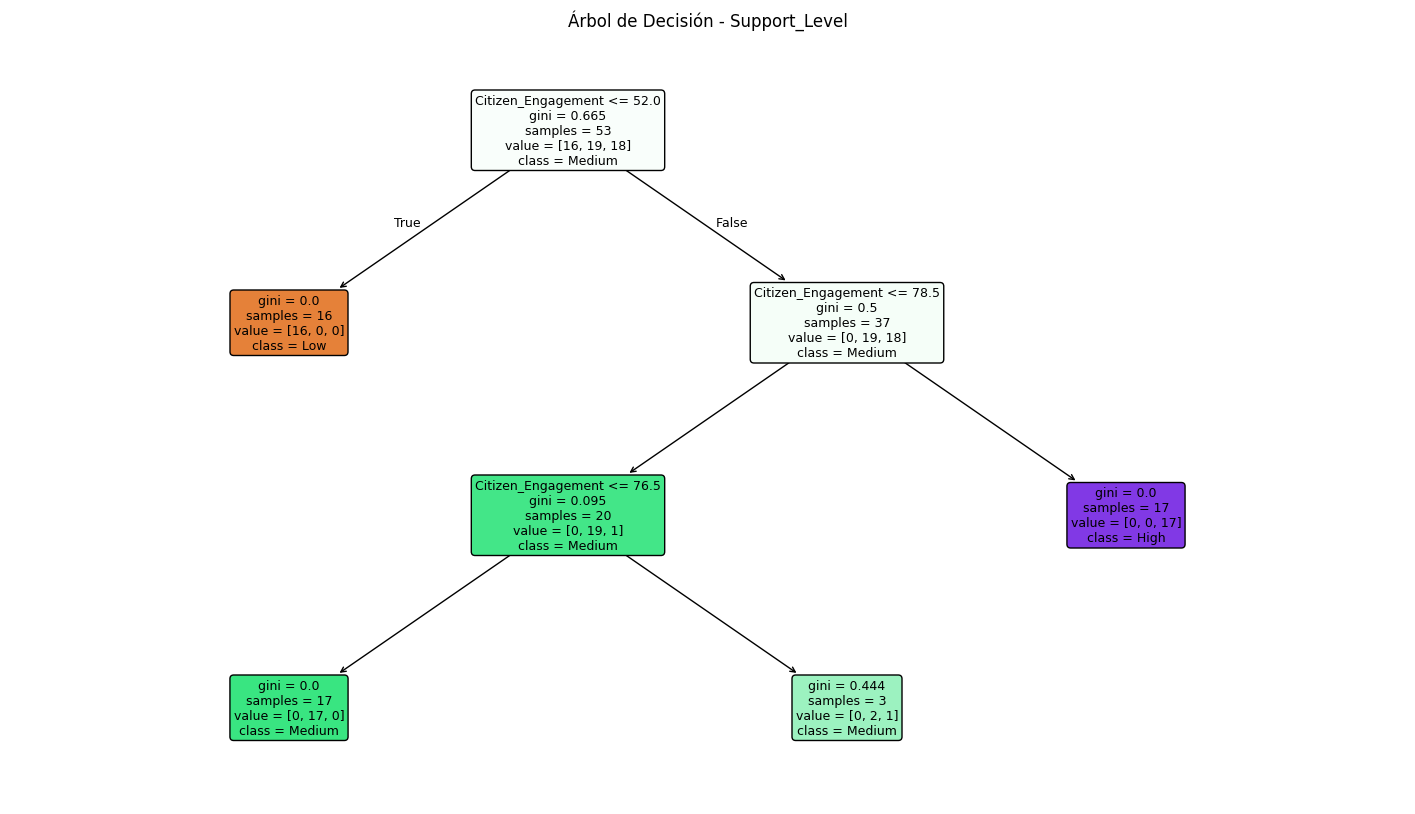

Interpretación breve: la primera regla (raíz) divide por 'Citizen_Engagement <= 52.000'.
Las ramas resultantes van refinando la decisión hasta asignar Low/Medium/High.


In [14]:
plt.figure(figsize=(18, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["Low", "Medium", "High"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Árbol de Decisión - Support_Level")
plt.show()

# Interpretación breve (raíz del árbol)
root_feature_idx = tree.tree_.feature[0]
root_threshold = tree.tree_.threshold[0]

if root_feature_idx != -2:
    root_feature = X.columns[root_feature_idx]
    print(f"Interpretación breve: la primera regla (raíz) divide por '{root_feature} <= {root_threshold:.3f}'.")
    print("Las ramas resultantes van refinando la decisión hasta asignar Low/Medium/High.")
else:
    print("Interpretación breve: el árbol no hizo splits (posible dataset muy pequeño o una sola clase).")
